# HW Lesson 8

**Взять датасет из google диска: https://drive.google.com/file/d/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_.**

**Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('marketing_campaign.csv')
users = pd.read_csv('users.csv')
subscribers = pd.read_csv('subscribers.csv')

1) user_id: идентификатор пользователя

2) date_served: дата события

3) marketing_channel: рекламный канал

4) variant: показанный вариант рекламы

5) converted: конверсия в покупку, 1 - пользователь совершил покупку, 0 - нет

6) language_displayed: язык рекламного сообщения

7) language_preferred: предпочитаемый пользователем язык

8) age_group: возрастная группа пользователя

9) date_subscribed: дата подписки на сервис

10) date_canceled: дата отказа от подписки

11) subscribing_channel: с какого рекламного канал пришел пользователь, когда подписался на сервис

12) is_retained: удержание, 1 - пользователь продолжает пользоваться услугами сервиса, 0 - пользователь отвалился 

In [3]:
df.head(2)

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True


In [4]:
df.variant.value_counts()

control            5091
personalization    4946
Name: variant, dtype: int64

выборки для A|B теста сильного дисбаланса не имеют

In [5]:
A = df[df.variant == 'personalization']
B = df[df.variant != 'personalization']

In [6]:
n1 = A.shape[0]
n2 = B.shape[0]
k1 = A.loc[A.converted == 1, 'converted'].sum()
k2 = B.loc[B.converted == 1, 'converted'].sum()

In [7]:
p1, p2 = k1 / n1, k2 / n2
print(f'конверсия при А = {p1:.2f}, при B = {p2:.2f}')

конверсия при А = 0.14, при B = 0.07


есть существенная разница конверсий при различных вариантах рекламы

In [8]:
# посчитаем Z значение
P = (p1 * n1 + p2 * n2) / (n1 + n2)
z = (p1 - p2) / (P * (1 - P) * (1/n1 + 1/n2))**(1/2)
z

11.278864170859038

In [9]:
from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), 
                                                 np.array([n1, n2]))

print(f'Results are z_score={z_score:.3f} pvalue={z_pvalue:.3f}')

Results are z_score=11.279 pvalue=0.000


In [10]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), 
                                                        np.array([n1, n2]))

print(f'Results are chisq={chisq:.3f} pvalue={pvalue:.3f}')

Results are chisq=127.213 pvalue=0.000


**на обоих тестах очень низкий p_value и очень высокие показатели статистик, что соответствует тому, что альтернативная гипотеза о том, что выборка А существенно отличается от выборки B по целевому признаку**

сравним отдельно признаки между выборками A и B

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.merge(df, users, on='user_id').merge(subscribers, on='user_id')
df.head(2)

,user_id,date_served,marketing_channel,variant,language_displayed,converted,age_group,language_preferred,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,1/1/18,House Ads,personalization,English,True,0-18 years,English,House Ads,1/1/18,NaN,True
1,a1001,1/1/18,House Ads,personalization,English,True,19-24 years,English,House Ads,1/1/18,NaN,True


In [13]:
cols = ['marketing_channel', 'language_displayed', 'age_group', 'language_preferred', 'subscribing_channel', 'is_retained']

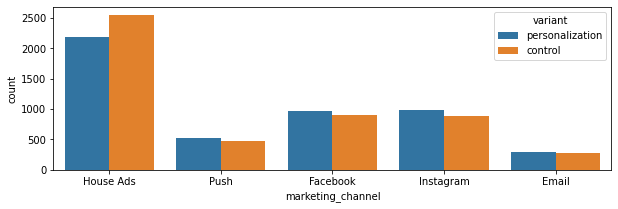

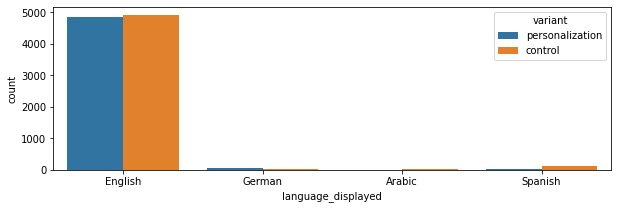

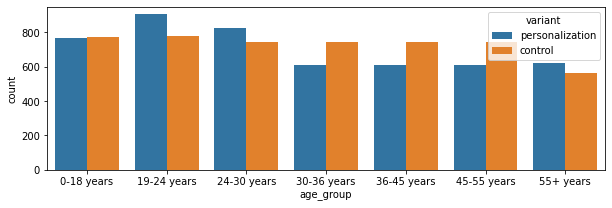

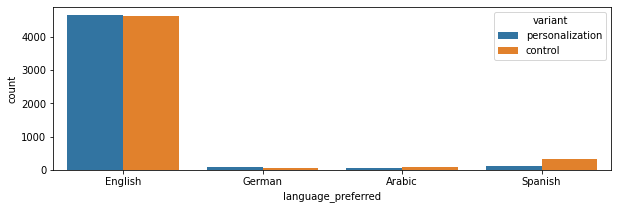

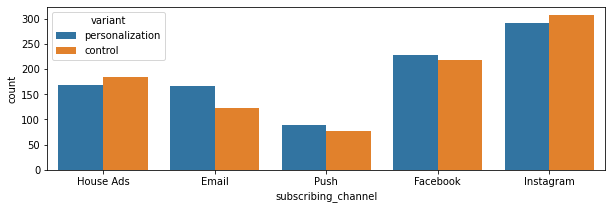

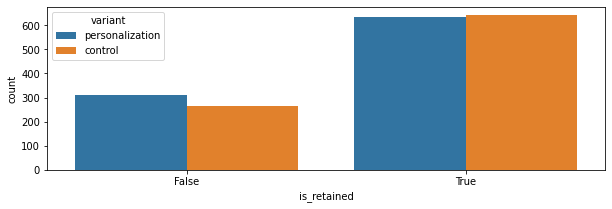

In [15]:
for col in cols:
    plt.figure(figsize=(10, 3))
    sns.countplot(data=df, x=col, hue='variant')
    plt.show()